In [2]:
## Program written by Nicholas Munoz
## Wine Data Set Imported with Kneighbor Classifier
from sklearn.datasets import load_wine
dataset = load_wine()
X = dataset.data
Y = dataset.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)


In [4]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

In [5]:
import numpy as np

estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [6]:
y_predicted = estimator.predict(X_test)

#test the accuracy
accuracy = np.mean(y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 71.1%


In [7]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
average_accuracy = np.mean(scores)*100
print("The accuracy is {0:.1f}%".format(average_accuracy))

The accuracy is 66.4%


In [8]:
import warnings
warnings.filterwarnings('ignore')

avg_scores = []
all_scores = []
parameters = list(range(1,20))
for n_neighbors in parameters:
    estimator = KNeighborsClassifier()
    scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

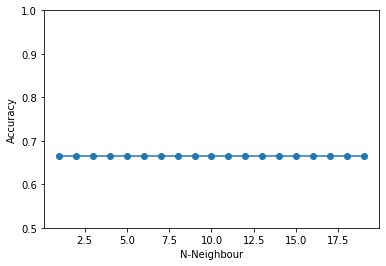

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(parameters, avg_scores, '-o')
plt.xlabel('N-Neighbour')
plt.ylabel('Accuracy')
plt.ylim([0.5,1.0])

plt.show()


In [10]:
from sklearn.datasets import load_iris
import numpy as np

dataset = load_iris() #Data from sklearn library
X = dataset.data
Y = dataset.target

X_d = np.array( X>X.mean(), dtype='int')

In [11]:
## One Rule 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import OrderedDict
from sklearn.datasets import load_iris
att = [ 'Sepal Length',
        'Sepal Width',
        'Petal Length',
        'Petal Width']

dataset = load_iris()
X = dataset.data
Y = dataset.target

Iris_data = OrderedDict({'Sepal Length ': X[:,0],
             'Sepal Width': X[:,1],
             'Petal Length': X[:,2],
             'Petal Width': X[:,3],
             'Label': Y})

df = pd.DataFrame(Iris_data)
pd.set_option('display.max_rows', 10)
df


,Sepal Length,Sepal Width,Petal Length,Petal Width,Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
def Rule(a):
    means = [] # hold attribute means for each species
    means.append(np.mean(a[:50]))     # setosa
    means.append(np.mean(a[50:100]))  # versicolor
    means.append(np.mean(a[100:150])) # virginica
    
    # take the average value between means to be edges
    edges = [(means[0] + (means[1] - means[0])/2),
             (means[1] + (means[2] - means[1])/2)]
    # correct for cases where edges are decreasing
    if edges[0] > edges[1]:
        temp = edges[0]
        edges[0] = edges[1]
        edges[1] = temp
    return edges
def Frequency(attribute, rule):
    
    Type = []
    for i in range(len(attribute)):
        
        if (attribute[i] < rule[0]):
            Type.append(0)
            
        elif (attribute[i] >= rule[0] and attribute[i] < rule[1]):
            Type.append(1)
            
        elif (attribute[i] >= rule[1]):
            Type.append(2)
    
    return Type


In [13]:
def TargetCount(AttrArray, target):
    
    count = 0
    
    for i in range(len(target)):
        if AttrArray[i] == target[i]:
            count += 1
            
    return count

In [14]:
def Accuracy(Prediction, target):
    
    return (Prediction/len(target))*100

In [15]:
## Sepal Length / Accuracy
edge_Seplength = Rule(X[:,0]) 
Frequency_Seplength = Frequency(X[:,0], edge_Seplength) 
Prediction = TargetCount(Frequency_Seplength, Y)
##
print("Length Counts:",Prediction)
Accuracy_SepL = Accuracy(Prediction, Y)
print('\n')
print("Sepal Length Accuracy:", Accuracy_SepL, '%')
#Sepal Width Accuracy
edge_SepW = Rule(X[:,1]) 
Frequency_SepW = Frequency(X[:,1], edge_SepW) 
Prediction = TargetCount(Frequency_SepW, Y)
Accuracy_SepW = Accuracy(Prediction, Y)
##
print('\n')
print("Sepal Width Accuracy:", Accuracy_SepW, '%')

Length Counts: 112


Sepal Length Accuracy: 74.66666666666667 %


Sepal Width Accuracy: 22.0 %


In [16]:
## Petal Length / Accuracy
edge_Petlength = Rule(X[:,2]) 
Frequency_Petlength = Frequency(X[:,2], edge_Petlength) 
Prediction = TargetCount(Frequency_Petlength, Y)
##
print("Length Counts:", Prediction)
Accuracy_PetL = Accuracy(Prediction, Y)
print('\n')
print("Petal Length Accuracy:", Accuracy_PetL, '%')
#Petal Width Accuracy
edge_PetW = Rule(X[:,3]) 
Frequency_PetW = Frequency(X[:,3], edge_PetW) 
Prediction = TargetCount(Frequency_PetW, Y)
Accuracy_PetW = Accuracy(Prediction, Y)
##
print('\n')
print("Petal Width Accuracy:", Accuracy_PetW, '%')


Length Counts: 142


Petal Length Accuracy: 94.66666666666667 %


Petal Width Accuracy: 96.0 %


What we can conclude is that from our data that Petal Width is the best indicator for our One Rule to be the best predictor 